In [248]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fonm
from matplotlib import font_manager, rc
mpl.rcParams['axes.unicode_minus'] = False
font_path = "C:/Windows/Fonts/정직_1.ttf"
font = fonm.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [249]:
starbucks = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\스타벅스(ID분류).csv', encoding = 'UTF-8')
coffeebean = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\커피빈(ID분류).csv', encoding = 'UTF-8')
ediya = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\이디야(ID분류).csv', encoding = 'UTF-8')
paik = pd.read_csv('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\소상공인시장진흥공단_상가(상권)정보_20210630\\결과\\빽다방(ID분류).csv', encoding = 'UTF-8')

In [250]:
map_raw = pd.read_excel('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\draw_korea_raw(2021).xlsx')
map_raw.stack()
map = pd.DataFrame(map_raw.stack())
map.reset_index(inplace = True)
print(map.shape)
map.head()
map.columns = ['y','x','ID']
map.head()

(250, 3)


,y,x,ID
0,0,7,철원
1,0,8,화천
2,0,9,양구
3,0,10,고성(강원)
4,1,3,양주


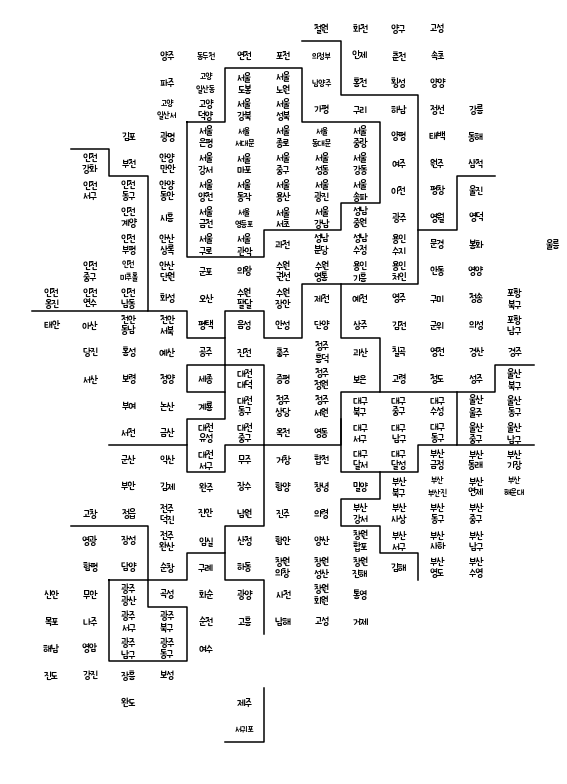

In [251]:
from draw_map import BORDER_LINES, drawKorea, drawKoreaMinus

plt.figure(figsize=(8,11))

for idx, row in map.iterrows():
    # 광역시는 구 이름이 겹치는 경우가 많아서 광역시 이름도 같이 표시 
    # (중구, 서구 등)
    if len(row.ID.split())==2:
        dispname = f'{row.ID.split()[0]}\n{row.ID.split()[1]}'
    elif row.ID[:2]=='고성':
        dispname = '고성'
    else:
        dispname = row.ID

    # 서대문구, 서귀포시 같이 이름이 3자 이상인 경우에 작은 글자로 표시
    if len(dispname.splitlines()[-1]) >= 3:
        fontsize, linespacing = 9.5, 1.5
    else:
        fontsize, linespacing = 11, 1.2

    plt.annotate(dispname, (row['x']+0.5, row['y']+0.5), weight='bold',
                 fontsize=fontsize, ha='center', va='center', 
                 linespacing=linespacing)
    
# 시도 경계
for path in BORDER_LINES:
    ys, xs = zip(*path)
    plt.plot(xs, ys, c='black', lw=1.5)

plt.gca().invert_yaxis()
#plt.gca().set_aspect(1)

plt.axis('off')

plt.tight_layout()
plt.show()

In [252]:
def count_brand(sample, str_value):
    map_raw = pd.read_excel('C:\\Workspace\\python\\Data_Science\\dataA\\Cartogram Practice Data\\draw_korea_raw(2021).xlsx')
    map = pd.DataFrame(map_raw.stack())
    map.reset_index(inplace = True)
    map.columns = ['y','x','ID']
    sample = pd.merge(sample, map, how = 'left', on = 'ID')
    sample.dropna(subset = ['x'], inplace = True)
    sample = pd.DataFrame(sample.ID.value_counts())
    sample = sample.reset_index()
    sample.columns = ['ID', str_value + '_num_of_stores']
    return sample

In [253]:
ediya = count_brand(ediya, 'ediya')
starbucks = count_brand(starbucks, 'starbucks')
coffeebean = count_brand(coffeebean, 'coffeebean')
paik = count_brand(paik, 'paik')

In [254]:
ediya.ID.value_counts()

남양주      1
인천 옹진    1
대전 중구    1
대전 대덕    1
김천       1
        ..
서울 도봉    1
제주       1
서산       1
속초       1
옥천       1
Name: ID, Length: 203, dtype: int64

In [255]:
sample = pd.merge(starbucks, coffeebean, how = 'left', on = 'ID')
sample = pd.merge(sample, ediya, how = 'left', on = 'ID')
sample = pd.merge(sample, paik, how = 'left', on = 'ID')

In [256]:
sample.isnull().sum()

ID                           0
starbucks_num_of_stores      0
coffeebean_num_of_stores    93
ediya_num_of_stores          5
paik_num_of_stores          42
dtype: int64

In [257]:
sample.fillna(0, inplace = True)
sample.isnull().sum()

ID                          0
starbucks_num_of_stores     0
coffeebean_num_of_stores    0
ediya_num_of_stores         0
paik_num_of_stores          0
dtype: int64

In [258]:
for i in sample.index:
    sample.starbucks_num_of_stores[i] = float(sample.starbucks_num_of_stores[i])
    sample.starbucks_num_of_stores[i] = int(sample.starbucks_num_of_stores[i])
    sample.coffeebean_num_of_stores[i] = float(sample.coffeebean_num_of_stores[i])
    sample.coffeebean_num_of_stores[i] = int(sample.coffeebean_num_of_stores[i])
    sample.ediya_num_of_stores[i] = float(sample.ediya_num_of_stores[i])
    sample.ediya_num_of_stores[i] = int(sample.ediya_num_of_stores[i])
    sample.paik_num_of_stores[i] = float(sample.paik_num_of_stores[i])
    sample.paik_num_of_stores[i] = int(sample.paik_num_of_stores[i])

In [259]:
sample.dtypes

ID                           object
starbucks_num_of_stores       int64
coffeebean_num_of_stores    float64
ediya_num_of_stores         float64
paik_num_of_stores          float64
dtype: object

In [260]:
sample['coffee_index'] = np.nan
sample.head()

,ID,starbucks_num_of_stores,coffeebean_num_of_stores,ediya_num_of_stores,paik_num_of_stores,coffee_index
0,서울 강남,79,47.0,27.0,9.0,NaN
1,서울 중구,43,8.0,17.0,5.0,NaN
2,서울 서초,42,26.0,18.0,4.0,NaN
3,서울 송파,33,8.0,32.0,8.0,NaN
4,부산 해운대,33,4.0,8.0,2.0,NaN


In [261]:
for i in sample.index:
    try:
        sample['coffee_index'][i] = (sample.starbucks_num_of_stores[i] + sample.coffeebean_num_of_stores[i]) / \
                                    (sample.ediya_num_of_stores[i] + sample.paik_num_of_stores[i])
    except:
        pass

In [262]:
sample.head()

,ID,starbucks_num_of_stores,coffeebean_num_of_stores,ediya_num_of_stores,paik_num_of_stores,coffee_index
0,서울 강남,79,47.0,27.0,9.0,3.500000
1,서울 중구,43,8.0,17.0,5.0,2.318182
2,서울 서초,42,26.0,18.0,4.0,3.090909
3,서울 송파,33,8.0,32.0,8.0,1.025000
4,부산 해운대,33,4.0,8.0,2.0,3.700000


In [268]:
sample = pd.merge(sample, map, how = 'outer', on = 'ID')
sample.isnull().sum()

ID                           0
starbucks_num_of_stores     91
coffeebean_num_of_stores    91
ediya_num_of_stores         91
paik_num_of_stores          91
coffee_index                91
y_x                         91
x_x                         91
y_y                         91
x_y                         91
y                            0
x                            0
dtype: int64

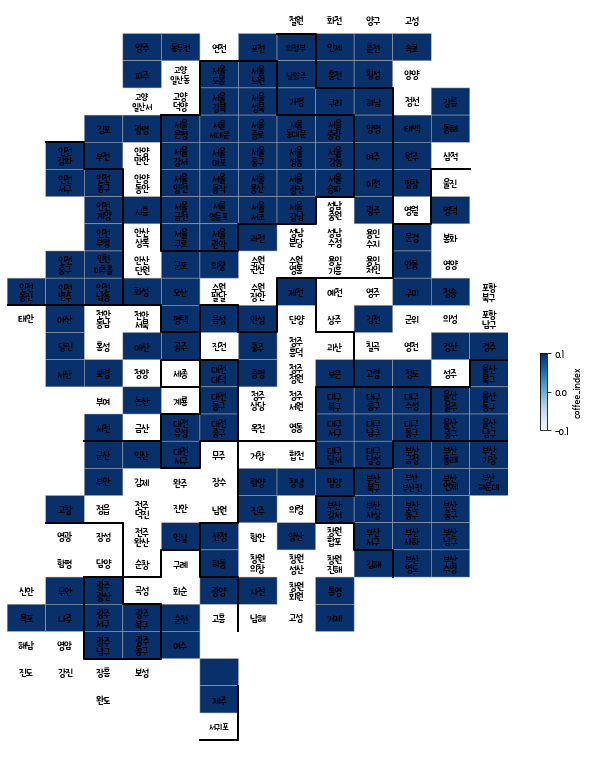

In [269]:
drawKorea('coffee_index', sample, 'Blues')